In [14]:
#import schtuff
from geopy.extra.rate_limiter import RateLimiter
from geopy import Nominatim
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#set jp options
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 300)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
ls

README.md           docs/               notebooks/          requirements.txt
SOF_Analysis.ipynb  env/                references/         src/
data/               images/             reports/


In [3]:
#import data
df = pd.read_csv('../Capstone_Project_I/data/vets_SOF.csv',  encoding="ISO-8859-1")

In [4]:
tribes = df[(df['Tribe'] != 'Non-SOF')&(df['Tribe'] != 'SOF Enabler')]

In [5]:
round(tribes.Tribe.value_counts()/len(tribes) * 100, 2)

Green Beret      27.26
SEAL             19.95
Pilot            15.29
Ranger            8.24
NEOD              6.91
SWCC              5.85
Raider            5.19
Helo Pilot        4.26
PJ                2.66
CCT               1.86
PSYOPS            0.93
Recon             0.80
EOD               0.27
SOWT              0.27
Civil Affairs     0.13
JCU               0.13
Name: Tribe, dtype: float64

In [6]:
df.Branch.value_counts()/len(df.Branch) * 100

Navy            42.686170
Army            40.292553
Air Force        8.776596
Marine Corps     8.111702
Coast Guard      0.132979
Name: Branch, dtype: float64

In [7]:
def percent(df):
    divisor = sum(df)
    return round(df/sum(df) * 100, 2)
percent(df[df['Branch'] == 'Navy']['Tribe'].value_counts())

SEAL          46.73
Pilot         22.43
NEOD          16.20
SWCC          13.71
Helo Pilot     0.62
JCU            0.31
Name: Tribe, dtype: float64

In [8]:
branches = df['Branch'].unique()

In [9]:
tribes = tribes[tribes['Branch'] != 'Coast Guard']
tribes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 751
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      751 non-null    object 
 1   Birthdate                               78 non-null     object 
 2   CreatedDate                             751 non-null    object 
 3   Location                                750 non-null    object 
 4   City                                    749 non-null    object 
 5   State                                   749 non-null    object 
 6   How_did_you_hear_about_Elite_Meet       540 non-null    object 
 7   Your_transition_to_civilian_life_begin  451 non-null    object 
 8   Undergrad                               638 non-null    object 
 9   Undergrad_School                        684 non-null    object 
 10  Undergrad_major                         681 non-null    object

In [10]:
percent(tribes[tribes['Branch'] == 'Navy']['Tribe'].value_counts()).values

array([46.73, 22.43, 16.2 , 13.71,  0.62,  0.31])

In [11]:
branches = branches[:4]

In [15]:
plt.style.use('grayscale')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']

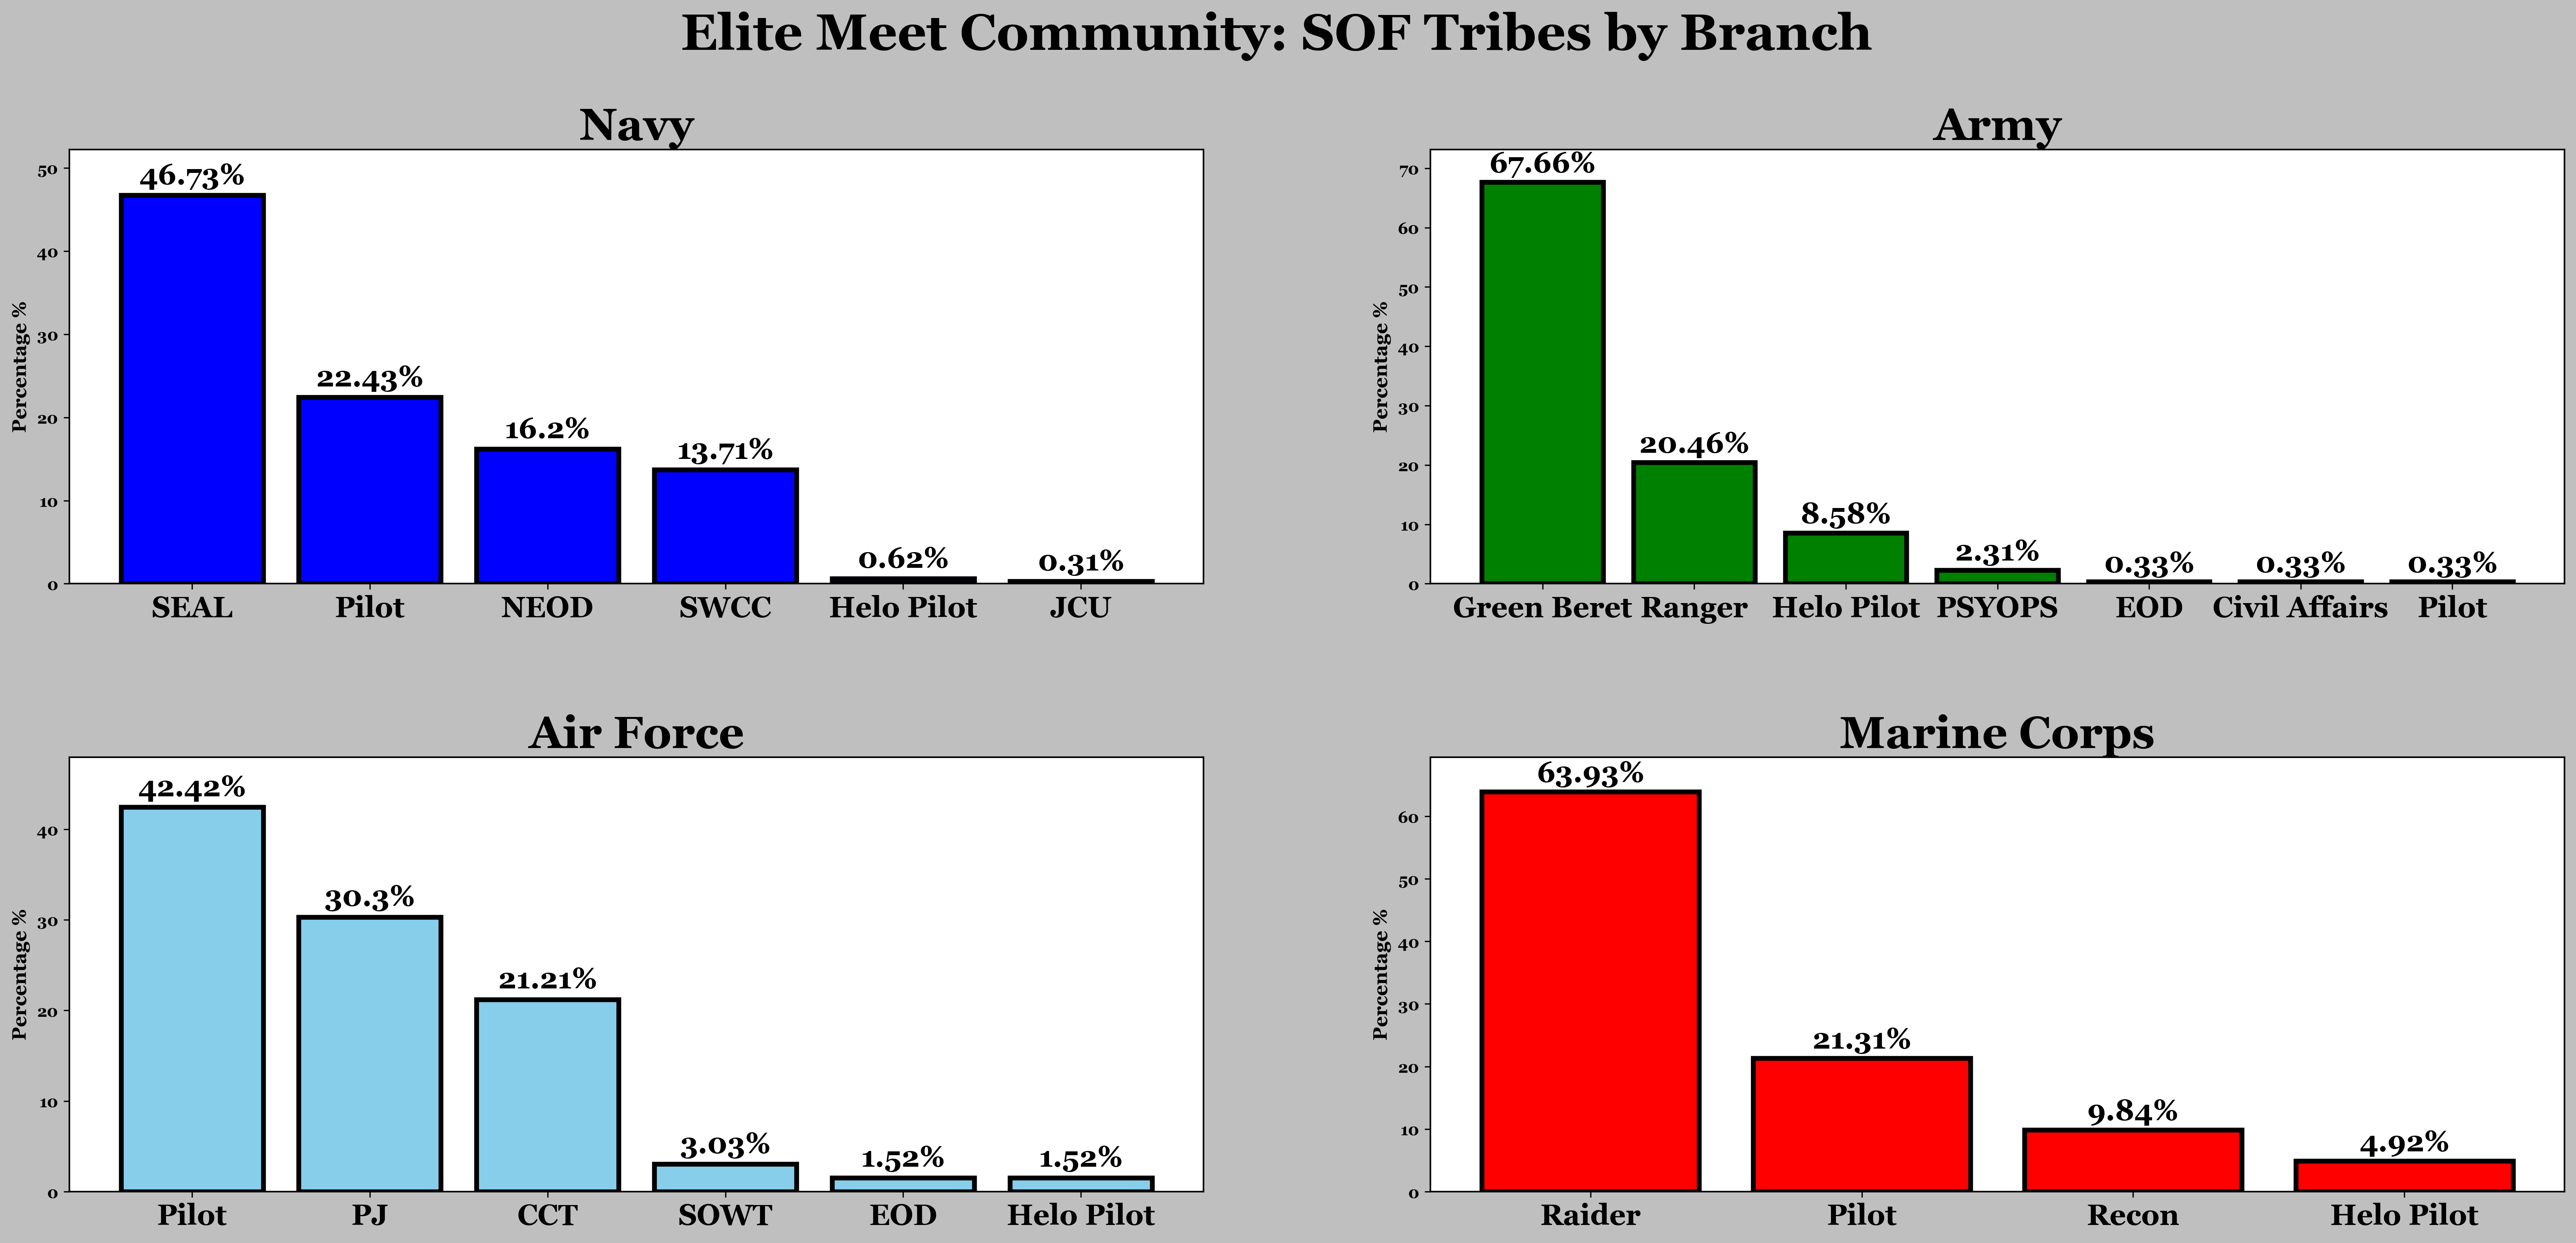

In [16]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(28,12))
suptitle = fig.suptitle('Elite Meet Community: SOF Tribes by Branch', fontweight='bold', fontsize=32)

colors = ['blue', 'green', 'skyblue', 'red']
for i, branch in enumerate(branches):
    ax = fig.add_subplot(2,2,i+1)
    ax.grid(False)
    df = percent(tribes[tribes['Branch'] == branch]['Tribe'].value_counts())
    _ = plt.bar(x=df.index, height=df.values, data=df, color=colors[i], edgecolor='k', linewidth=3)
    
    rects = _.patches
    
    # Make some labels.
    labels = [f"{value}%" for value in df.values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        txt = plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5 , label,
                ha='center', va='bottom', fontweight='bold', fontsize=18)
    _ = fig.subplots_adjust(left=None, bottom=None, right=None, wspace=None, hspace=0.4)
    title = ax.set_title(f'{branch}', fontsize=28, fontweight='bold')
    xticks = plt.xticks(fontweight='bold', fontsize=18)
    yticks = plt.yticks(fontweight='bold')
    #xlabel = plt.xlabel('Tribe', fontweight='bold', fontsize=14, labelpad=20)
    ylabel = plt.ylabel('Percentage %', fontweight='bold')
    ylim = plt.ylim(0,max(df.values) + 5.5)


In [ ]:
fig = plt.figure(figsize=(28,12))

colors = ['blue', 'green', 'skyblue', 'red']
for i, branch in enumerate(branches):
    ax = fig.add_subplot(2,2,i+1)
    ax.grid(False)
    df = percent(tribes[tribes['Branch'] == branch]['Tribe'].value_counts())
    _ = plt.bar(x=df.index, height=df.values, data=df, color=colors[i], edgecolor='k', linewidth=3)
    
    rects = _.patches
    
    # Make some labels.
    labels = [f"{value}%" for value in df.values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        txt = plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5 , label,
                ha='center', va='bottom', fontweight='bold')
    _ = fig.subplots_adjust(left=None, bottom=None, right=None, wspace=None, hspace=0.4)
    title = ax.set_title(f'{branch}', fontsize=24, fontweight='bold')
    xticks = plt.xticks(fontweight='bold', fontsize=14)
    yticks = plt.yticks(fontweight='bold')
    #xlabel = plt.xlabel('Tribe', fontweight='bold', fontsize=14, labelpad=20)
    ylabel = plt.ylabel('Percentage %', fontweight='bold')
    ylim = plt.ylim(0,max(df.values) + 5.5)


In [93]:
percent(tribes['Tribe'].value_counts())

Green Beret      27.22
SEAL             20.05
Pilot            15.67
Ranger            8.37
NEOD              6.91
SWCC              5.84
Raider            5.18
Helo Pilot        3.72
PJ                2.66
CCT               1.86
PSYOPS            0.93
Recon             0.80
EOD               0.27
SOWT              0.27
Civil Affairs     0.13
JCU               0.13
Name: Tribe, dtype: float64

In [172]:
tribes['Birthdate'] = pd.to_datetime(tribes['Birthdate'])

In [173]:
tribes['CreatedDate'] = pd.to_datetime(tribes['CreatedDate'])

In [174]:
tribes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 873
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Id                                      753 non-null    object        
 1   Birthdate                               78 non-null     datetime64[ns]
 2   CreatedDate                             753 non-null    datetime64[ns]
 3   Location                                753 non-null    object        
 4   City                                    753 non-null    object        
 5   State                                   753 non-null    object        
 6   How_did_you_hear_about_Elite_Meet       541 non-null    object        
 7   Your_transition_to_civilian_life_begin  452 non-null    object        
 8   Undergrad                               640 non-null    object        
 9   Undergraduate_School                    687 non-null  

In [190]:
officers = tribes[(tribes['Tribe'] == 'Pilot')|(tribes['Tribe'] == 'Helo Pilot')|(tribes['Military_specialty_in_real_words'].str.contains('officer'))|(tribes['Military_specialty_in_real_words'].str.contains('Officer'))|(tribes['Undergraduate_School'].str.contains('Academy'))]

In [178]:
tribes['Military_specialty_in_real_words'].fillna('No entry', inplace=True)

In [191]:
len(officers)

306

,Id,Birthdate,CreatedDate,Location,City,State,How_did_you_hear_about_Elite_Meet,Your_transition_to_civilian_life_begin,Undergrad,Undergraduate_School,Undergrad_major,Grad_Degree,Graduate_School,Grad_Degree_Type,Years_of_Service,Military_specialty_in_real_words,Whichcourse,When_did_you_graduate,What_was_your_first_unit_after_grad,Branch,Tribe,What_locations_do_you_WANT_to_live_in,Where_do_you_NOT_WANT_to_live,What_would_be_your_ideal_next_job,Target_Industries_Pls_pick_up_to_Three,of_informational_interviews_completed,of_job_formal_interviews_completed,of_counting_getting_a_job_through_EM,What_s_more_important_to_you,How_mobile_are_you_and_your_family,Lead_RecordType
6,003f400000dbEV0AAM,1975-04-12,2018-10-23 16:30:00,"San Diego,CA",San Diego,CA,Coworkers,NaN,Complete,U.S. Naval Academy,Physics,Complete,NaN,MBA,20.0,SEAL Officer,BUD/S (SEAL),5/20/99 0:00,SEAL Team ONE,Navy,SEAL,North East,Southeast,NaN,Finance;Non-Profit;Tech,NaN,NaN,NaN,Job,NaN,Veteran
12,003f400000dbI4JAAU,1973-09-29,2018-10-23 16:48:00,"Tampa,FL",Tampa,FL,LinkedIn,NaN,Complete,United States Air Force Academy,BS Military History,Complete,NaN,MBA International Business,21.0,F-15E Weapon Systems Officer,Winged as a fighter pilot (Flight Officer),4/1/99 0:00,"494th Fighter Squadron RAF Lakenheath,UK",Air Force,Pilot,Tampa/Orlando FL area,West Coast or Northeast USA,NaN,IT / Cyber Security;Aerospace and Defense;Tech,NaN,NaN,NaN,Location,NaN,Veteran
13,003f400000dbI4KAAU,1981-08-23,2018-10-23 16:48:00,"Somerville,MA",Somerville,MA,Fellow veteran,NaN,Complete,United States Military Academy,Economics,In Progress,NaN,MBA,13.0,Army Special Operations Aviator (MH-6M Little Bird),Helo Pilot,11/7/11 0:00,TF 1-160th SOAR(A),Army,Helo Pilot,"Boston,the Midwest,or the Pacific Northwest","Arizona,Texas",NaN,Finance;Aerospace and Defense;Tech,NaN,NaN,NaN,Job,NaN,Veteran
15,003f400000dbI4MAAU,1987-01-05,2018-10-23 16:48:00,"Lemoore,CA",Lemoore,CA,Linkedin connection,NaN,Complete,Oregon State University,"Radiation Health Physics,B.S",NaN,NaN,NaN,9.0,F-18 Weapons Systems Officer,Winged as a fighter pilot (Flight Officer),2/28/12 0:00,VFA-122 as a Student WSO,Navy,Pilot,"Lemoore/Fresno,CA / Salt Lake City,UT / Portland,OR",Locations outside of a reasonable distance from the above preferences,NaN,Entrepreneurship;Engineering;Defense Contracting,NaN,NaN,NaN,Location,NaN,Veteran
16,003f400000dbI4OAAU,1975-08-19,2018-10-23 16:48:00,"Washington,DC",Washington,DC,NaN,NaN,Complete,Business Management,University of Phoenix,NaN,NaN,MBA,20.0,Special Forces Officer,Q Course (SF),8/12/08 0:00,"10th Special Forces Group,Fort Carson",Army,Green Beret,"Washington DC area,Colorado,Utah,Texas,and most European countries.","Louisiana,Mississippi,Arkansas,California",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Veteran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,003f400001XGQizAAH,NaT,2020-09-01 18:43:00,"Camp Lejeune,NC",Jacksonville,NC,Through a Vets Club contact at Booth,8/1/21 0:00,Complete,UNC-Chapel Hill,Global Studies,NaN,NaN,NaN,8.0,"I am an 0370 Special Operations Officer / Marine Raider. I was an Infantry Officer before that,when passing IOC was still hard.",Individual Training Course (Raider),5/15/18 0:00,2d Marine Raider Battalion,Marine Corps,Raider,"Colorado,Arizona,California,Pacific Northwest","NYC,Boston,Chicago","Getting my feet wet in the private sector,international exposure",Consulting;Security;Tech,0,0,Not a ton,Location,5,Veteran
862,003f400001XGQjdAAH,NaT,2020-09-01 18:44:00,"Washington,DC",Washington,DC,Justin Loufty,4/1/22 0:00,Complete,USMA,Political Science,Complete,Naval Postgraduate School,NaN,21.0,Special Forces Officer,Q Course (SF),5/20/05 0:00,3D Special Forces Group,Army,Green Beret,"Washington,DC; Northern VA; Chapel Hill,NC; New York City",West Coast,Running a small to mid-sized company,Entrepreneurship;Consulting;Non-Profit,More than 10,0,Not a ton,Location,2,Veteran
866,003f400001XjHTeAAN,N

In [195]:
officerIds = officers['Id']

In [200]:
pd.set_option('display.max_rows', 500)
tribes[~tribes['Id'].isin(officerIds)]

,Id,Birthdate,CreatedDate,Location,City,State,How_did_you_hear_about_Elite_Meet,Your_transition_to_civilian_life_begin,Undergrad,Undergraduate_School,Undergrad_major,Grad_Degree,Graduate_School,Grad_Degree_Type,Years_of_Service,Military_specialty_in_real_words,Whichcourse,When_did_you_graduate,What_was_your_first_unit_after_grad,Branch,Tribe,What_locations_do_you_WANT_to_live_in,Where_do_you_NOT_WANT_to_live,What_would_be_your_ideal_next_job,Target_Industries_Pls_pick_up_to_Three,of_informational_interviews_completed,of_job_formal_interviews_completed,of_counting_getting_a_job_through_EM,What_s_more_important_to_you,How_mobile_are_you_and_your_family,Lead_RecordType
0,003f400000cZo1bAAC,NaT,2018-10-16 15:40:00,"Washington,DC",Washington,DC,NaN,NaN,Complete,"University of Charleston,WV",Organizational Leadership,NaN,NaN,NaN,25.0,SEAL,BUD/S (SEAL),NaN,NaN,Navy,SEAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Veteran
1,003f400000cZo3EAAS,NaT,2018-10-16 15:40:00,"Chattanooga, TN",Chattanooga,TN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,MBA- Vandy,NaN,No entry,Q Course (SF),NaN,NaN,Army,Green Beret,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Veteran
2,003f400000dbBWeAAM,1989-03-14,2018-10-23 16:17:00,"San Diego,CA",San Diego,CA,NaN,NaN,NaN,NaN,None,NaN,NaN,Real Estate,9.0,SEAL,BUD/S (SEAL),7/31/10 0:00,SEAL Team 7,Navy,SEAL,San Diego/ Southern CA,"Mid west,south",NaN,Real Estate,NaN,NaN,NaN,Location,NaN,Veteran
3,003f400000dbEUxAAM,1983-09-29,2018-10-23 16:30:00,"Houston,TX",Houston,TX,CPT Christopher Greer,NaN,Complete,West Point,Business Management,In Progress,NaN,Business,11.0,Special Forces Team Commander,Q Course (SF),9/15/14 0:00,20th Special Forces Group,Army,Green Beret,"Houston,Fort Lauderdale,New York",West Coast,NaN,Entrepreneurship;Healthcare;Real Estate,NaN,NaN,NaN,Job,NaN,Veteran
4,003f400000dbEUyAAM,1992-07-04,2018-10-23 16:30:00,"New York,NY",New York,NY,Friend,NaN,In Progress,Columbia,Economics,None,NaN,NaN,4.0,Infantry,RASP (RR),11/20/11 0:00,2/75 Ranger Regiment,Army,Ranger,"East or West Coast,Chicago",N/a,NaN,Finance;Consulting;Tech,NaN,NaN,NaN,Job,NaN,Veteran
5,003f400000dbEUzAAM,1977-02-26,2018-10-23 16:30:00,"Richmond,VA",Richmond,VA,referral,NaN,Complete,Fordham University,Physics/Music Minor,Complete,NaN,MBA,5.0,SWCC,Crewman Qualification Training (SWCC),5/1/04 0:00,NSW SBT 12,Navy,SWCC,East Coast or West Coast,Midwest/Central States,NaN,Entrepreneurship;Engineering;Tech,NaN,NaN,NaN,Job,NaN,Veteran
7,003f400000dbEV1AAM,1988-12-08,2018-10-23 16:30:00,"Virginia Beach,VA",Virginia Beach,VA,Colleague,NaN,Complete,University of Scranton,Criminal Justice,None,NaN,NaN,6.0,Special Warfare Combatant Craft Crewman,Crewman Qualification Training (SWCC),9/12/13 0:00,Special Boat Team 20,Navy,SWCC,"Philadelphia,PA",NaN,NaN,Finance;Consulting;Government,NaN,NaN,NaN,Location,NaN,Veteran
8,003f400000dbEV2AAM,1982-01-11,2018-10-23 16:30:00,"Boston,MA",Boston,MA,NaN,NaN,NaN,Finance,Harvard Extension,NaN,NaN,"Entrepreneurship,Finance,Tech",7.0,SEAL,BUD/S (SEAL),4/20/06 0:00,ST1,Navy,SEAL,"CA,HA,OCONUS,WY,MT,CO,TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Veteran
9,003f400000dbEV3AAM,1988-10-22,2018-10-23 16:30:00,"Virginia Beach,VA",Virginia Beach,VA,teammate,NaN,Complete,University of Mississippi,Journalism,None,NaN,NaN,6.0,Special Boat Operator (SWCC),Crewman Qualification Training (SWCC),3/21/14 0:00,Special Boat Team Twenty,Navy,SWCC,Southeast. Closer to the coast if I can manage.,"Due to spending the last 6 years away from family -- North of South Carolina,West of Mississippi.",NaN,Entrepreneurship;Consulting;Real Estate,NaN,NaN,NaN,Location,NaN,Veteran
10,003f400000dbEV4AAM,1975-12-25,2018-10-23 16:30:00,"New York,NY",New York,NY,Founder / Jordan Selleck,NaN,Complete,Geneva College (PA),Business management (finance),Complete,NaN,MBA and MSF,14.0,Special Forces Intelligence Sergeant and Special Forces Medical Sergeant,Q Course (SF),11/18/07 0:00,"B Co,2nd Bn,3rd Special Forces Group",Army,Green Beret,New York City,Not NYC,NaN,Finance,NaN,NaN,NaN,Location

In [145]:
df = pd.read_csv('data/vets_SOF.csv', encoding="ISO-8859-1")

In [131]:
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])

<AxesSubplot:>

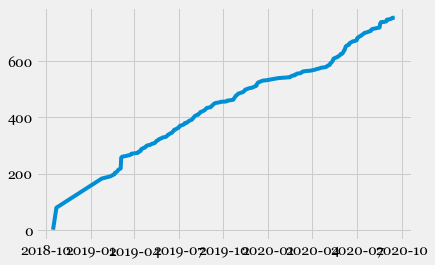

In [132]:
df['CreatedDate'].dt.date.value_counts().sort_index().cumsum().plot()

In [133]:
df['Branch'].value_counts()

Navy            322
Army            303
Air Force        66
Marine Corps     61
Coast Guard       1
Name: Branch, dtype: int64

In [134]:
branches = ['Navy', 'Army', 'Air Force', 'Marine Corps']
colors = ['blue', 'green', 'skyblue', 'red']

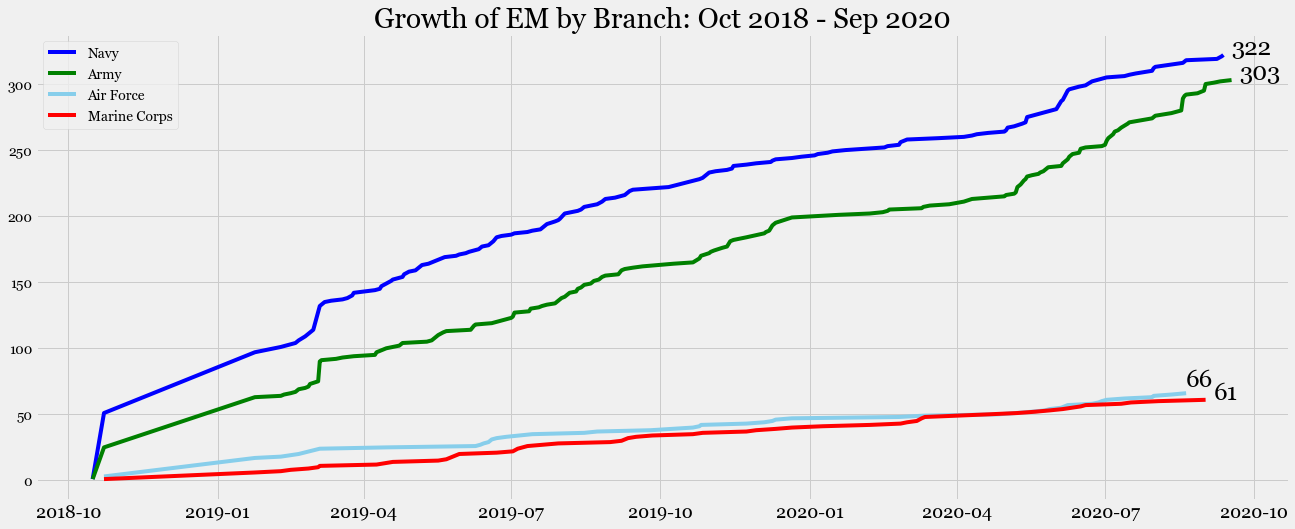

In [135]:
fig = plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
for branch, color in zip(branches, colors):
    temp = df[df['Branch'] == branch]
    data = temp['CreatedDate'].dt.date.value_counts().sort_index().cumsum()
    last_day = data.index[-1]
    total_count = data[-1]
    plot = data.plot(label=branch, c=color)
    if branch != 'Air Force':
        text = plt.text(last_day + pd.DateOffset(days=5), total_count, str(total_count), fontsize=24) 
    else: text = plt.text(last_day, total_count + 5, str(total_count), fontsize=24) 
legend = plt.legend()
ticks = plt.xticks(fontsize=18)
title = plt.title('Growth of EM by Branch: Oct 2018 - Sep 2020', fontsize=28)

In [61]:
test = df[df['Branch'] == 'Navy']
test['CreatedDate'].dt.date.value_counts().sort_index().cumsum().index[-1]

datetime.date(2020, 9, 12)

In [97]:
tribe_names = tribes['Tribe'].unique()
tribe_names

array(['SEAL', 'Green Beret', 'Ranger', 'SWCC', 'Pilot', 'Helo Pilot',
       'Raider', 'PJ', 'NEOD', 'CCT', 'Recon', 'PSYOPS', 'SOWT', 'EOD',
       'Civil Affairs', 'JCU'], dtype=object)

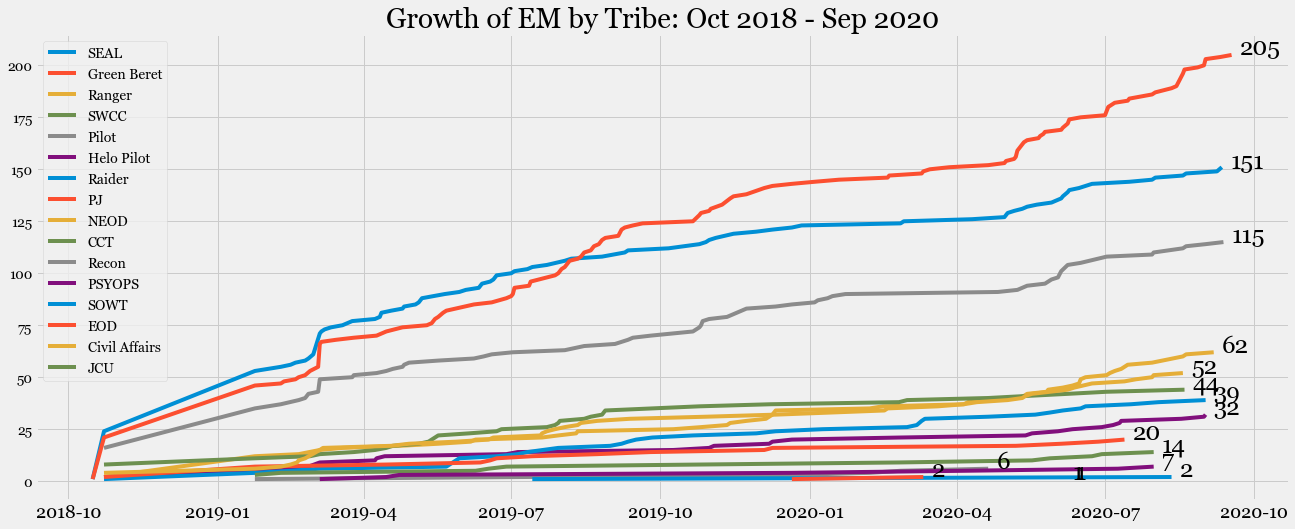

In [136]:
fig = plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
for name in tribe_names:
    temp = df[df['Tribe'] == name]
    data = temp['CreatedDate'].dt.date.value_counts().sort_index().cumsum()
    last_day = data.index[-1]
    total_count = data[-1]
    plot = data.plot(label=name)
    #if branch != 'Air Force':
    text = plt.text(last_day + pd.DateOffset(days=5), total_count, str(total_count), fontsize=24) 
    #else: text = plt.text(last_day, total_count + 5, str(total_count), fontsize=24) 
legend = plt.legend()
ticks = plt.xticks(fontsize=18)
title = plt.title('Growth of EM by Tribe: Oct 2018 - Sep 2020', fontsize=28)

In [137]:
len(df[df['Tribe'] == 'SEAL'])

151

In [138]:
df[df['How_did_you_hear_about_Elite_Meet'].str.contains('Allen')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [111]:
sum(df['How_did_you_hear_about_Elite_Meet'].isnull())

212

In [139]:
df['How_did_you_hear_about_Elite_Meet'][df['How_did_you_hear_about_Elite_Meet'].fillna('None').str.contains("John")]
                                                                                                        

197                          John Allen
207               LinkedIn - John Allen
215                          John Allen
278                          John Allen
279                          John Allen
301                          John Allen
350               LinkedIn - John Allen
366                          John Allen
470                          John Allen
512                          John Allen
516                          John Allen
519               LinkedIn - John Allen
523               LinkedIn - John Allen
551                          John Allen
552                          John Allen
578                          John Allen
589                          John Allen
608                          John Allen
636    Johnny Moses from Care Coalition
Name: How_did_you_hear_about_Elite_Meet, dtype: object

In [123]:
df['How_did_you_hear_about_Elite_Meet'][df['How_did_you_hear_about_Elite_Meet'].fillna('None').str.contains("Garret")]


451                                                                                         Garrett Harrell
455                                                                                          Garret Harrell
519                                                                                          Garret Harrell
535                                                                           MSgt Michael "Garret" Harrell
625    Garret Harrell reached out via THF connection and was very personable in extending a warm greeting .
Name: How_did_you_hear_about_Elite_Meet, dtype: object

In [128]:
pd.set_option('display.max_rows', 500)

In [169]:
df = pd.read_csv('data/vets_SOF.csv', encoding="ISO-8859-1")

## Marketing

In [157]:
marketing = df['How_did_you_hear_about_Elite_Meet'].value_counts()[df['How_did_you_hear_about_Elite_Meet'].value_counts() > 2]

<AxesSubplot:>

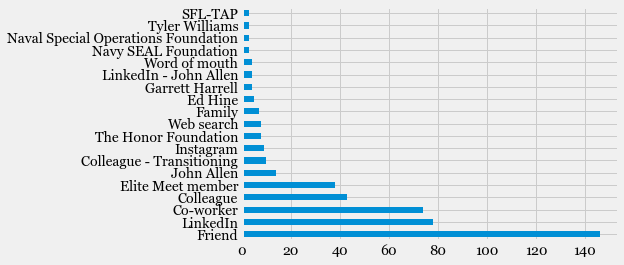

In [165]:
marketing.plot.barh()
ticks = plt.xticks()

In [168]:
marketing/464 * 100

Friend                                 31.465517
LinkedIn                               16.810345
Co-worker                              15.948276
Colleague                               9.267241
Elite Meet member                       8.189655
John Allen                              3.017241
Colleague - Transitioning               2.155172
Instagram                               1.939655
The Honor Foundation                    1.724138
Web search                              1.724138
Family                                  1.508621
Ed Hine                                 1.077586
Garrett Harrell                         0.862069
LinkedIn - John Allen                   0.862069
Word of mouth                           0.862069
Navy SEAL Foundation                    0.646552
Naval Special Operations Foundation     0.646552
Tyler Williams                          0.646552
SFL-TAP                                 0.646552
Name: How_did_you_hear_about_Elite_Meet, dtype: float64

## Education

In [183]:
sum(df['Grad_Degree_Type'].notnull())

181

In [181]:
sum(df['Grad_Degree'].notnull())

350

In [182]:
sum(df['Graduate_School'].notnull())

279

In [184]:
df['Grad_Degree'].value_counts()

Complete       222
In Progress    128
Name: Grad_Degree, dtype: int64

In [192]:
grads = df[df['Grad_Degree'].notnull()]

In [199]:
grads_complete = grads[grads['Grad_Degree'] == 'Complete']

<AxesSubplot:ylabel='Frequency'>

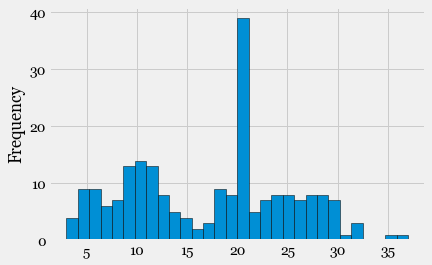

In [213]:
grads_complete['Years_of_Service'].plot.hist(bins=30, edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

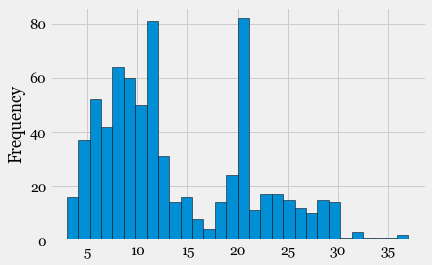

In [207]:
df.Years_of_Service.plot.hist(bins=30, edgecolor='black')

In [221]:
len(df[df['Years_of_Service'].between(18,40)])/754

0.3183023872679045

In [223]:
len(df[df['Years_of_Service'].between(0,6)])/754

0.13925729442970822

In [220]:
len(df[df['Years_of_Service'].between(12,17)])/754

0.14986737400530503

In [ ]:
pd.Series.between